In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path,header=-1)
    res = []
    for index, row in df.iterrows():
        left = row[0]
        right = row[1]
        res.extend([left]*right)
    return res        

### load data for plotting
* The values has been log-transformed. 

### And then see the data stats
* the data is original

In [2]:
def load_plot_describe(file_dir, qntl, plot_title = ""):
    %matplotlib inline
    res = load_data(file_dir + ".csv")
    res_origin = res
    res = np.log([x+0.1 for x in res])
    #res = np.log(res)  

    fig1, ax1 = plt.subplots(figsize=(8, 10))
    if plot_title != "":
        ax1.set_title(plot_title)
    ax1.boxplot(res)
    fig1.savefig(file_dir + ".pdf")
    plt.show()

    from scipy import stats
    print(stats.describe(res_origin))

    # for median ...
    print("median: ", np.median(res_origin))

    # also count 25% quantile 75% quantile ,etc.
    print("quantile x10%", np.quantile(res_origin, [0.1 * k for k in range(qntl)]))

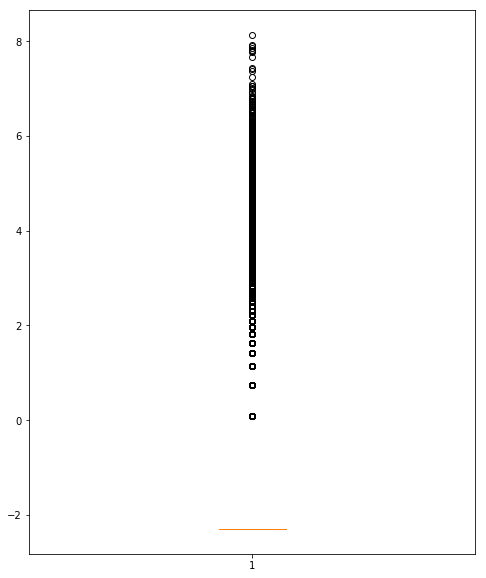

DescribeResult(nobs=213711, minmax=(0, 3407), mean=2.082592847349926, variance=597.4189937469067, skewness=63.3581625885301, kurtosis=6041.990200324238)
median:  0.0


AttributeError: module 'numpy' has no attribute 'quantile'

In [4]:
load_plot_describe("TheNumberOfVoteAKernelHas_nKernel", 
#'the distribution of the number of vote the kernels have(value is log-tranformed)', 
10)

In [ ]:
load_plot_describe("TheNumberOfKernelAnAuthorHas_nAuth", 
#'the distribution of the number of kernels authors have (value is log-tranformed)', 
10)

In [ ]:
load_plot_describe("UsedByHowManyKernels_nDataset", 
#'the distribution of the dataset\'s kernel number (value is log-tranformed)', 
10)

### Combination of graphs

In [5]:
## numpy is used for creating fake data
import numpy as np 
import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 

C:\Users\xmk233\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\xmk233\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\xmk233\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\xmk233\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xmk233\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\xmk233\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\x

In [6]:
## Create data
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list    
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

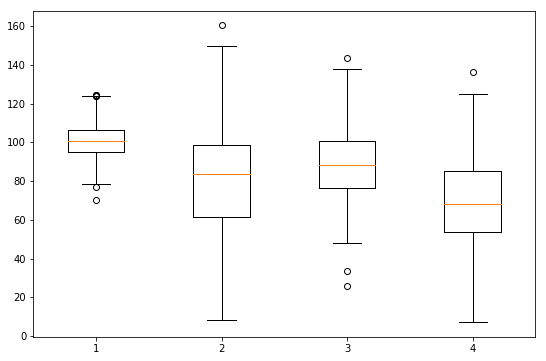

In [7]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

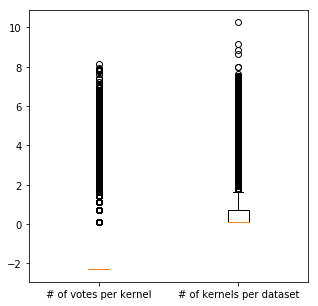

In [13]:
# reference: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

res1 = load_data("TheNumberOfVoteAKernelHas_nKernel" + ".csv")
res1 = np.log([x+0.1 for x in res1])
# res2 = load_data("TheNumberOfKernelAnAuthorHas_nAuth" + ".csv")
# res2 = np.log([x+0.1 for x in res2])
res3 = load_data("UsedByHowManyKernels_nDataset" + ".csv")
res3 = np.log([x+0.1 for x in res3])
data_to_plot = [res1, res3]#res2, 


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.boxplot(data_to_plot)
## of votes per kernel,  # of kernels per dataset, # of kernels per author
ax1.set_xticklabels(['# of votes per kernel', 
                    '# of kernels per dataset', 
#                     '# of kernels per author'
                    ])
fig1.savefig("preliminary_fig.pdf") # if you tried to save a .pdf file, you will get a blank picture. 
#plt.show()


In [ ]:
'''# Create a figure instance
fig = plt.figure(1, figsize=(6, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Custom x-axis labels
#ofvotesper kernel; #kernel per dataset; #of kernel per author,
ax.set_xticklabels(['#VotesPerKernel', 
                    '#KernelPerDataset', 
                    '#KernelPerAuthor'])

# Save the figure
fig.savefig('combined.pdf')#, bbox_inches='tight''''